<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Привет, этот проект тоже буду проверять я - Сысоева Вера. Поехали.

</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Расчет-оптимальных-тарифов" data-toc-modified-id="Расчет-оптимальных-тарифов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчет оптимальных тарифов</a></span></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span></li><li><span><a href="#Общий-вывод-и-рекомендации" data-toc-modified-id="Общий-вывод-и-рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод и рекомендации</a></span></li></ul></div>

# Дополнительные материалы

* **Презентация** —https://clck.ru/32ToNQ
* **Дашборд** — https://clck.ru/32TnVX

# Поиск клиента с неоптимальными тарифами

В данном проекте будет произведено исследования для компании «Нупозвони» — предоставлющей услуги виртуальной телефонии.  Основными клиентами компании являются организации, которым нужно распределять множество исходящих/входящих вызовов на различных операторов. Также операторы могут осуществлять внутренние вызовы, то есть вызовы друг между другом, которые осуществляются внутри сети виртуальной телефонии. Всего предоставляется 3 тарифных плана: «A», «B» и «C».

В первую очередь необходимо будет произвести исследовательский анализ данных, далее последует расчет оптимальных тарифов для клиентов.
После всего этого потребуется проверить сформулированные гипотезы и на основе этих данных сделать базовые рекомендации.

# Описание данных

*telecom_dataset*

- `user_id` — идентификатор клиента;
- `date` — дата статистики;
- `direction` — направление вызовов: `out` — исходящий вызов, `in` — входящий;
- `internal` — маркер внутренних и внешних вызовов;
- `operator_id` — идентификатор оператора;
- `is_missed_call` — маркер пропущенных вызовов;
- `calls_count` — количество звонков;
- `call_duration` — длительность звонка без учёта времени ожидания;
- `total_call_duration` — длительность звонка с учётом времени ожидания.

*telecom_clients*
 
 
- `user_id` — идентификатор клиента;
- `tariff_plan` — тарифный план клиента;
- `date_start` — дата регистрации клиента в сервисе.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

Импорт всех необходимых библиотек потребующихся для дальнейшей работы.

In [2]:
try:
    dataset, client = (
        pd.read_csv('/datasets/telecom_dataset.csv'),
        pd.read_csv('/datasets/telecom_clients.csv')
    )
except:
    dataset, client = (
        pd.read_csv('/datasets/telecom_dataset.csv'),
        pd.read_csv('/datasets/telecom_clients.csv')
    )

Подгрузка файлов с данными.

In [3]:
display(dataset.head())
client.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Данные верно подгружены

</div>

Общий вид данных.

In [4]:
dataset['date'] = pd.to_datetime(dataset['date'],format = '%Y-%m-%dT').dt.strftime('%Y-%m-%d')
dataset['date'] = pd.to_datetime(dataset['date'],format = '%Y-%m-%dT')

Перевод столбца с датой к более удобному формату.

In [5]:
# по первым 20 строчкам становится очевидно что это полные копии
dataset[dataset.duplicated(keep=False)].head(20)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
6,166377,2019-08-05,out,False,880020.0,True,8,0,50
8,166377,2019-08-05,out,False,880020.0,True,8,0,50
27,166377,2019-08-12,in,False,NaN,True,2,0,34
28,166377,2019-08-12,in,False,NaN,True,2,0,34
38,166377,2019-08-14,in,False,NaN,True,1,0,3
43,166377,2019-08-14,out,False,880026.0,False,10,1567,1654
44,166377,2019-08-14,out,False,880026.0,False,10,1567,1654
45,166377,2019-08-14,in,False,NaN,True,1,0,3
46,166377,2019-08-15,out,False,880026.0,False,11,1413,1473
51,166377,2019-08-15,out,False,880026.0,False,11,1413,1473


In [6]:
print(len(dataset[dataset.duplicated()]))
print(round(100 * (len(dataset[dataset.duplicated()]) / len(dataset)),2 ),"%")

4900
9.09 %


Количество дубликатов и их процент от общего количества строк датафрейма.

In [7]:
dataset = dataset.drop_duplicates()

<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

Да, удалить полные дубликаты можно. Но сначала все же стоит на них подробнее посмотреть, описать их природу, причины возниконовения. Удаление - это не универсальное решение. Также полезно показать долю добликатов
</div>

Удаление полных дубликатов.

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Подробнее рассмотрел дубликаты. Разве с ними можно сделать что то кроме удаления?  
Ведь в последствии они принесут только уменьшение точности вычислений 🤔
    
 </div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Как минимум их можно не удалять. Вот и надо посмотреть принисут ли они ухудшение точности. Если дубликаты - это действительно двойные записи об одном и томже объекте, то да. Но это не всегда так.

Кроме того предположить, почему они возникли также важно. Это поможет заказчику лучше собирать данные. Если, например, все дубликаты в одном КЦ - это же о чем-то скажет...

</div>

## Исследовательский анализ данных

In [8]:
dataset.info()
print("\n\n")
client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49002 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              49002 non-null  int64         
 1   date                 49002 non-null  datetime64[ns]
 2   direction            49002 non-null  object        
 3   internal             48892 non-null  object        
 4   operator_id          41546 non-null  float64       
 5   is_missed_call       49002 non-null  bool          
 6   calls_count          49002 non-null  int64         
 7   call_duration        49002 non-null  int64         
 8   total_call_duration  49002 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.4+ MB



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       ---------

Информация о типах данных предоставленных в таблицах.

In [9]:
display(pd.DataFrame(round((dataset.isna().mean()*100), 2), columns=['Пропуски %']).style.format(
    '{:.2f}').background_gradient(cmap='PuBu'))

display(pd.DataFrame(round((client.isna().mean()*100), 2), columns=['Пропуски %']).style.format(
    '{:.2f}').background_gradient(cmap='PuBu'))

,Пропуски %
user_id,0.00
date,0.00
direction,0.00
internal,0.22
operator_id,15.22
is_missed_call,0.00
calls_count,0.00
call_duration,0.00
total_call_duration,0.00


,Пропуски %
user_id,0.00
tariff_plan,0.00
date_start,0.00


<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Да, правильно, что ты отобразил процент пропусков, это нагляднее, чем абсолютные значения
</div>

Проверка наличия пропусков. Значительное количество пропусков имеется в столбце `operator_id.`

In [10]:
dataset[dataset['is_missed_call'] == True].query('direction == "in"')['operator_id'].isna().value_counts()

True     7202
False     685
Name: operator_id, dtype: int64

Пропуски в `operator_id` характеризуются типом звонка, это входящий неотвеченный звонок.  
Таковыми являются 7202 зафиксированных случаев. Остальные же могут являться ошибкой в базе данных.

In [11]:
#заглушка для пропущенных значений
dataset['operator_id'] = dataset['operator_id'].fillna('unknown')

<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

Ты так и не написал, что будешь делать с этими пропусками. Стоило их заполнить. Тогда можно было бы и тип данных поменять

</div>

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Заполнил пропуски в `operator_id` .
    
 </div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Идентификаторы числовые, и пропуски лучше было заполнять числом

</div>

In [12]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,49002.0,167294.892759,598.558965,166377.0,166782.0,167158.0,167819.0,168606.0
calls_count,49002.0,16.462777,63.604098,1.0,1.0,4.0,12.0,4817.0
call_duration,49002.0,866.282091,3775.503352,0.0,0.0,37.0,570.0,144395.0
total_call_duration,49002.0,1156.558202,4451.473661,0.0,46.0,208.0,901.0,166155.0


Вывод по общему значению всех числовых данных в таблице **dataset:**

* Среднее количество звонков в день 16
* Средняя суточная длительность звонков 866 минут
* Средняя суточная длительность звонков с учетом ожидания 1156 минут

Так же видно что в данных имеются сильные выбросы.  
Ими являются максимальные значения в столбцах `calls_count` , `call_duration` ,`total_call_duration.`


In [13]:
print('C' ,dataset['date'].min(), 'по',dataset['date'].max())

C 2019-08-02 00:00:00 по 2019-11-28 00:00:00


Временные рамки исследуемых данных. В нашем распоряжении информация за 4 неполных календарных месяца.

In [14]:
uniq_user = dataset.pivot_table(index='date', values='user_id', aggfunc='count').reset_index()
dataset['month'] = pd.to_datetime(dataset['date']).dt.month
uniq_user = dataset.groupby('month')['user_id'].agg('nunique').reset_index()

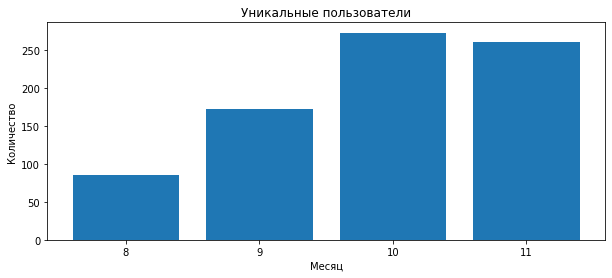

In [15]:
plt.figure(figsize =(10, 4))
plt.bar(uniq_user['month'], uniq_user['user_id'])
plt.locator_params(axis="both", integer=True, tight=True)

plt.title('Уникальные пользователи')
plt.xlabel('Месяц') 
plt.ylabel('Количество') 

plt.show()

Уникальные пользователь пользующиеся услугами компании по месяцам.

In [16]:
dataset['user_id'].nunique()

307

Количество уникальных пользователей пользующихся услугами компании. Всего в исследуемом периоде участвует 307 уникальных пользователя.

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Хорошо, все верно описано

</div>

In [17]:
data_client = dataset.copy()
data_client = data_client.merge(client, on='user_id', how='left')

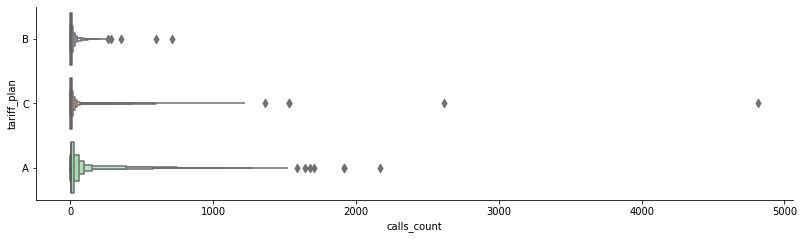

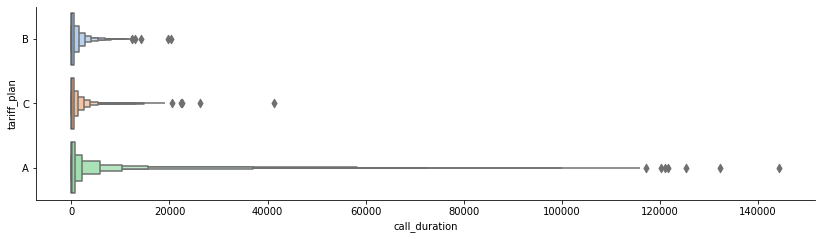

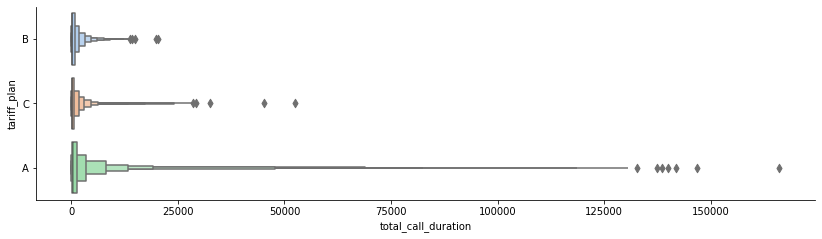

In [18]:
for column in ['calls_count', 'call_duration', 'total_call_duration']:
    
    g = sns.catplot(y='tariff_plan', x=column, kind="boxen", data= data_client, orient='h', palette ='pastel')
    g.fig.set_figwidth(12)
    g.fig.set_figheight(3)

Диаграммы размаха в разрезе тарифов для сравнения показателей и определения границ выбросов.

* Наиболее равномерное распределение значений по количеству и длительности звонков имеет тариф - «B»
* Выбросы в значениях количества ежедневых звонков характерны для тарифов - «A» и «C»
* Значительно большая часть выбросов по длительности звонков наблюдается у тарифа - «A»

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Здесь нужно описать, что мы видим на этих диаграммах. Просто констатировать, что мы их построили - мало. Или тогда вообще не нужнго их включать в проект. Графиков ради графиков быть не должно
</div>

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Добавил выводы по графику.
    
 </div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

+

</div>

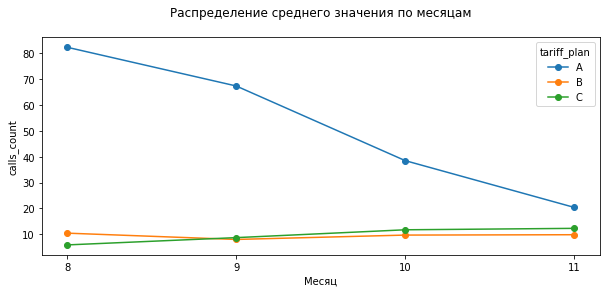

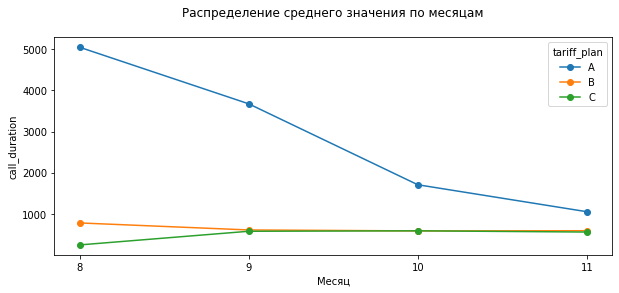

In [19]:
for column in ['calls_count', 'call_duration']:

    (data_client
     .pivot_table(index='tariff_plan', columns='month', values=column, aggfunc='mean')
     .T
     .plot(kind='line', figsize=(10,4),  style = 'o-')
    )
    plt.locator_params(axis="both", integer=True, tight=True)
    plt.title('Распределение среднего значения по месяцам'+ "\n")
    plt.xlabel('Месяц')
    plt.ylabel(column);

Графики среднего ежемесячного количества и длительности звонков в разрезе по тарифам.  
Заметен очевидный непрекращающийся спад у тарифа «A». Тарифы «B» и «C» имеют схожее распределение.

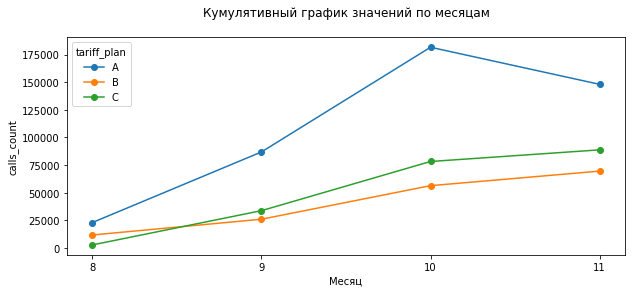

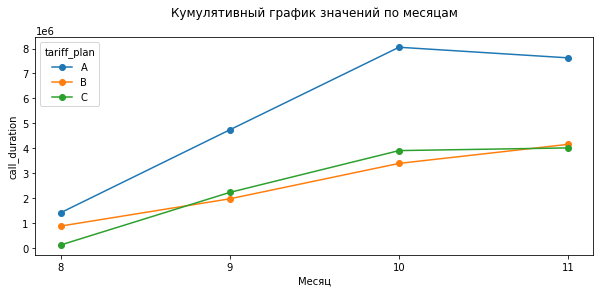

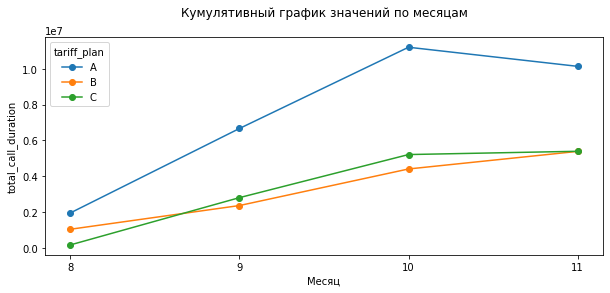

In [20]:
for column in ['calls_count', 'call_duration', 'total_call_duration']:

    (data_client
     .pivot_table(index='tariff_plan', columns='month', values=column, aggfunc='sum')
     .T
     .plot(kind='line', figsize=(10,4),  style = 'o-')
    )
    plt.locator_params(axis="both", integer=True, tight=True)
    plt.title('Кумулятивный график значений по месяцам'+ "\n")
    plt.xlabel('Месяц')
    plt.ylabel(column);

В течении всего исследуемого периода ежемесячные суммарные показатели длительности и количества звонков растут.  
В последний месяц исследуемого периода наблюдается небольшой спад, это может являться причиной того что данные неполные   
*(не хватает 3 дней до окончания месяца)*

In [21]:
day_minute = 60 * 24

In [22]:
print("Удаляется строк при применении фильтра:" ,
      len(data_client) - len(data_client.query('call_duration < @day_minute')))
print("% удаляемых строк при применении фильтра:" ,
      round(len(data_client) / (len(data_client) - len(data_client.query('call_duration < @day_minute'))),2 ))
print("Удаляется пользователей при применении фильтра:" ,
      data_client['user_id'].nunique() - data_client.query('call_duration < @day_minute')['user_id'].nunique())
print("Удаляется операторов при применении фильтра:" ,
      data_client['operator_id'].nunique() - data_client.query('call_duration < @day_minute')['operator_id'].nunique())


Удаляется строк при применении фильтра: 6823
% удаляемых строк при применении фильтра: 7.18
Удаляется пользователей при применении фильтра: 0
Удаляется операторов при применении фильтра: 2


In [23]:
#было
#data_client_clear = data_client.query('call_duration < @day_minute and total_call_duration < @day_minute')

#стало
data_client_clear = data_client.query('call_duration < @day_minute')

Для достоверности подсчетов установим максимальную суточную длительность звонков на одного пользователя 1440 минут.  
Учитывается только реальное время разговора без времени ожидания `call_duration.`  
Так как операторами могут являться не живые люди, а рабочие станции, то они могут работать 24 часа в сутки.  
И существует возможность того, что оператор может держать на линии одного человека, а вести разговор с другим.


Ограничения по количеству звонков не ставятся из за возможности произведения автоматических обзвонов.




<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

Вообще превышение 24 часов не столь критично, т.к. одновременно оператор может совершать несколько звонков    
</div>

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Сколько данных мы теряем таким фильтром? Сколько у нас остается КЦ, сколько операторов?
</div>

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Изменил способ фильтрации, добавил уточнение про его применение, а так же информацию о удалении данных.
    
 </div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Хорошо, 7% уже ощутимая величина

</div>

## Расчет оптимальных тарифов

In [24]:
# для проверки гипотез
data_client_hypotesis = data_client_clear.copy()

# для расчета выручки
data_client_clear = data_client_clear.query('direction != "in"')
data_client_clear.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month,tariff_plan,date_start
1,166377,2019-08-05,out,True,880022.0,True,3,0,5,8,B,2019-08-01
2,166377,2019-08-05,out,True,880020.0,True,1,0,1,8,B,2019-08-01
3,166377,2019-08-05,out,True,880020.0,False,1,10,18,8,B,2019-08-01
4,166377,2019-08-05,out,False,880022.0,True,3,0,25,8,B,2019-08-01
5,166377,2019-08-05,out,False,880020.0,False,2,3,29,8,B,2019-08-01


Для расчета выручки удаляются все входящие звонки, так как они не тарифицируются.

In [25]:
calls_pivot_in = data_client_clear.query('internal == True').pivot_table(index=['user_id',data_client['date'].dt.month],
                                   values='total_call_duration',
                                   aggfunc=['sum']).reset_index()

calls_pivot_in.columns = ['user_id','month','calls_min_in']

calls_pivot_in.head()

,user_id,month,calls_min_in
0,166377,8,96
1,166377,9,9
2,166377,10,5
3,166377,11,127
4,166391,8,7


In [26]:
calls_pivot_out = data_client_clear.query('internal == False').pivot_table(index=['user_id',data_client['date'].dt.month],
                                   values='total_call_duration',
                                   aggfunc=['sum']).reset_index()

calls_pivot_out.columns = ['user_id','month','calls_min_out']

calls_pivot_out.head()

,user_id,month,calls_min_out
0,166377,8,17130
1,166377,9,31220
2,166377,10,30235
3,166377,11,21144
4,166405,8,14725


Сводные таблицы с ежемесячной длительностью исходящих внутренних и внешних звонков.

In [27]:
operator = data_client_clear.pivot_table(index=['user_id',data_client['date'].dt.month],
                                   values='operator_id',
                                   aggfunc=['nunique']).reset_index()

operator.columns = ['user_id','month','operator']

operator.head()

,user_id,month,operator
0,166377,8,5
1,166377,9,4
2,166377,10,5
3,166377,11,5
4,166391,8,1


Сводные таблицы с ежемесячным количетсвом уникальных операторов на пользователя.

In [28]:
calls_pivot_full = calls_pivot_in.merge(calls_pivot_out, on=['user_id','month'], how='outer')
calls_pivot_full = calls_pivot_full.fillna(0)
calls_pivot_full = calls_pivot_full.merge(client[['tariff_plan','user_id']], on='user_id', how='left')
calls_pivot_full = calls_pivot_full.merge(operator[['user_id','operator','month']], on=['user_id','month'], how='left')

calls_pivot_full.head()

,user_id,month,calls_min_in,calls_min_out,tariff_plan,operator
0,166377,8,96.0,17130.0,B,5
1,166377,9,9.0,31220.0,B,4
2,166377,10,5.0,30235.0,B,5
3,166377,11,127.0,21144.0,B,5
4,166391,8,7.0,0.0,C,1


Объединение сводных таблиц.

In [29]:
df = pd.DataFrame([[5000, 2000, 0.1, 0.4, 100], [2000, 2000, 0.15, 0.5, 100], [1000, 2000, 0.3, 0.7, 100]],
     index=['A', 'B', 'C'],
     columns=['price','free_in','in_per_minute','out_per_minute','per_operator'])
df

,price,free_in,in_per_minute,out_per_minute,per_operator
A,5000,2000,0.10,0.4,100
B,2000,2000,0.15,0.5,100
C,1000,2000,0.30,0.7,100


<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Правильно, что ты сделал таблицу с показателями тарифов
</div>

Таблица с информацией о тарифах.

In [30]:
def income(row):
    tariff = row['tariff_plan']
    calls_in = row['calls_min_in']
    calls_out = row['calls_min_out']
    operator = row['operator']
    
    if tariff == 'A':
        income = 0
        if calls_in > df['price'][0]:
            income += (calls_in - df['free_in'][0]) * df['in_per_minute'][0]
        income += calls_out * df['out_per_minute'][0]
        income +=  operator * df['per_operator'][0]
        income += df['price'][0]
        return income
    
    if tariff == 'B':
        income = 0
        if calls_in > df['price'][1]:
            income += (calls_in - df['free_in'][1]) * df['in_per_minute'][1]
        income += calls_out * df['out_per_minute'][1]
        income +=  operator * df['per_operator'][1]
        income += df['price'][1]
        return income
    
    if tariff == 'C':
        income = 0
        if calls_in > df['price'][2]:
            income += (calls_in - df['free_in'][2]) * df['in_per_minute'][2]
        income += calls_out * df['out_per_minute'][2]
        income +=  operator * df['per_operator'][2]
        income += df['price'][2]
        return income

<div class="alert alert-success">
    
**Комментарий ревьюера**

**#ок**

Правильно, что ты написал функцию, возможно и не слишком оптимальную
</div>

Функция для подсчета ежемесячной прибыли.

In [31]:
calls_pivot_full['income'] = calls_pivot_full.apply(income,axis=1)
calls_pivot_full.head()

,user_id,month,calls_min_in,calls_min_out,tariff_plan,operator,income
0,166377,8,96.0,17130.0,B,5,11065.0
1,166377,9,9.0,31220.0,B,4,18010.0
2,166377,10,5.0,30235.0,B,5,17617.5
3,166377,11,127.0,21144.0,B,5,13072.0
4,166391,8,7.0,0.0,C,1,1100.0


Применение вышеописанной функции, результатом работы которой становится новый столбец.

In [32]:
income_various_tariff = calls_pivot_full.copy()

In [33]:
def income_2(row):
    tariff = row['tariff_plan']
    calls_in = row['calls_min_in']
    calls_out = row['calls_min_out']
    operator = row['operator']
    
    income_a = 0
    if calls_in > df['price'][0]:
        income_a += (calls_in - df['free_in'][0]) * df['in_per_minute'][0]
    income_a += calls_out * df['out_per_minute'][0]
    income_a +=  operator * df['per_operator'][0]
    income_a += df['price'][0]
    
    income_b = 0
    if calls_in > df['price'][1]:
        income_b += (calls_in - df['free_in'][1]) * df['in_per_minute'][1]
    income_b += calls_out * df['out_per_minute'][1]
    income_b +=  operator * df['per_operator'][1]
    income_b += df['price'][1]
    
    income_c = 0
    if calls_in > df['price'][2]:
        income_c += (calls_in - df['free_in'][2]) * df['in_per_minute'][2]
    income_c += calls_out * df['out_per_minute'][2]
    income_c +=  operator * df['per_operator'][2]
    income_c += df['price'][2]
        
    return income_a, income_b, income_c

<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

А вот здесь нужно было использовать предыдущую функцию внутри новой. Иначе ты два раза одно и тоже пишешь
</div>

Функция для подсчета ежемесячной прибыли каждого пользователя на разных тарифах.

In [34]:
income_various_tariff['a'], income_various_tariff['b'], income_various_tariff['c'] = zip(
    *income_various_tariff.apply(income_2, axis=1))
#for EDA
calls_min = income_various_tariff.copy()

income_various_tariff.drop(columns = ['calls_min_in','calls_min_out','operator'], axis=1, inplace=True) 

income_various_tariff.reset_index(drop=True).head()

,user_id,month,tariff_plan,income,a,b,c
0,166377,8,B,11065.0,12352.0,11065.0,13491.0
1,166377,9,B,18010.0,17888.0,18010.0,23254.0
2,166377,10,B,17617.5,17594.0,17617.5,22664.5
3,166377,11,B,13072.0,13957.6,13072.0,16300.8
4,166391,8,C,1100.0,5100.0,2100.0,1100.0


Применение фунцкии с подсчетом прибыли на разных тарифах.

In [35]:
a = income_various_tariff[['a','b','c']].T.min()
income_various_tariff = income_various_tariff.merge(a.rename('cheap'), left_index=True, right_index=True)
income_various_tariff['loss'] = income_various_tariff['income'] - income_various_tariff['cheap']
income_various_tariff.head()

,user_id,month,tariff_plan,income,a,b,c,cheap,loss
0,166377,8,B,11065.0,12352.0,11065.0,13491.0,11065.0,0.0
1,166377,9,B,18010.0,17888.0,18010.0,23254.0,17888.0,122.0
2,166377,10,B,17617.5,17594.0,17617.5,22664.5,17594.0,23.5
3,166377,11,B,13072.0,13957.6,13072.0,16300.8,13072.0,0.0
4,166391,8,C,1100.0,5100.0,2100.0,1100.0,1100.0,0.0


Поиск самого дешевого тарифа для каждого пользовател и расчет ежемесячной разницы при пероводе клиента на этот тариф.

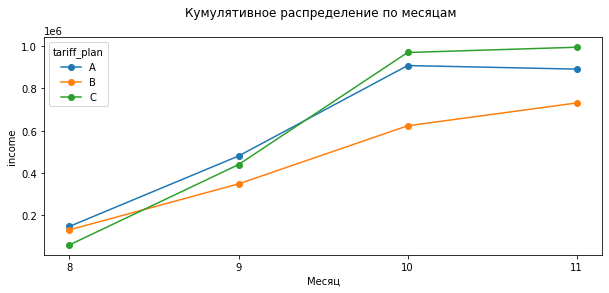

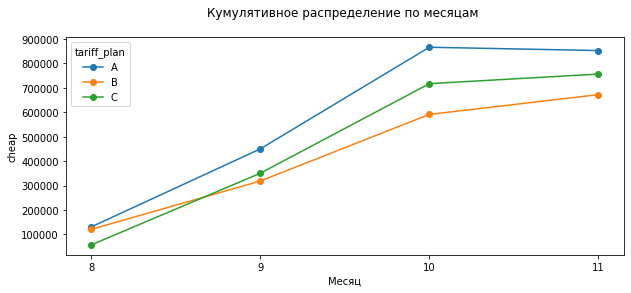

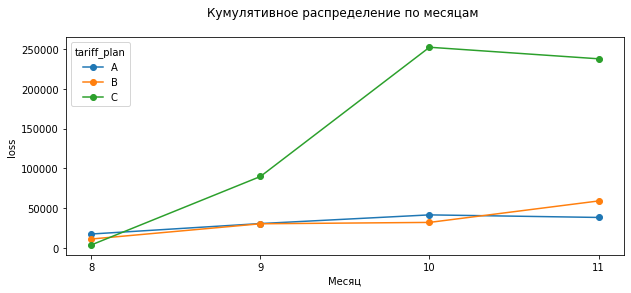

In [36]:
for column in ['income', 'cheap', 'loss']:

    (income_various_tariff
     .pivot_table(index='tariff_plan', columns='month', values=column, aggfunc='sum')
     .T
     .plot(kind='line', figsize=(10,4),  style = 'o-')
    )
    plt.locator_params(axis="both", integer=True, tight=True)
    plt.title('Кумулятивное распределение по месяцам '+ "\n")
    plt.xlabel('Месяц')
    plt.ylabel(column);

Накопительные графики распределения прибыли/потерь по месяцам.

Можно сделать следующие выводы:
* Наиболее прибыльный тариф для компании - «C»
* При переводе клиентов на более выгодный для них тариф - «A», компании будет зарабатывать меньше только первые 3 месяца.
* Наибольшие потери компания понесет при переводе клиентов с тарифа - «C» на другие.

In [37]:
def best_tariff(df):
    cheap = df['cheap']
    a = df['a']
    b = df['b']
    c = df['c']
    
    if cheap == a:
        return "A"
    if cheap == b:
        return "B"
    if cheap == c:
        return "C"
    
income_various_tariff['best_tariff'] = income_various_tariff.apply(best_tariff, axis=1)
income_various_tariff.head()

,user_id,month,tariff_plan,income,a,b,c,cheap,loss,best_tariff
0,166377,8,B,11065.0,12352.0,11065.0,13491.0,11065.0,0.0,B
1,166377,9,B,18010.0,17888.0,18010.0,23254.0,17888.0,122.0,A
2,166377,10,B,17617.5,17594.0,17617.5,22664.5,17594.0,23.5,A
3,166377,11,B,13072.0,13957.6,13072.0,16300.8,13072.0,0.0,B
4,166391,8,C,1100.0,5100.0,2100.0,1100.0,1100.0,0.0,C


Определение названия лучшего ежемесячного тарифа для каждого пользователя.

In [38]:
loss = income_various_tariff.groupby('user_id').agg('sum').sort_values(by='loss',ascending=False).reset_index()
loss[['user_id','loss']].query('loss > 0')

,user_id,loss
0,167827,127666.6
1,167125,55736.8
2,167150,40469.1
3,166782,33244.8
4,166520,31746.2
...,...,...
146,167130,124.2
147,167188,122.2
148,167053,77.4
149,167955,74.8


Таблица с идентификатором пользователя и суммой которую бы недополучила компания, при переводе их на оптимальный тариф.  
Всего в нашем распоряжении 147 таких пользователей.

In [39]:
round(loss['loss'].sum())

844423

Общая сумма потерь за весь исследуемый период, при переводе клиентов на оптимальные тарифы.

In [40]:
round(income_various_tariff.query('month == 11')['cheap'].sum())

2280636

Прибыль компании за 11 месяц исследуемого периода.

In [41]:
round(100 * (round(loss['loss'].sum()) / round(income_various_tariff.query('month == 11')['cheap'].sum())),2 )

37.03

Относительное процентное соотношение общих потерь компании к прибыли за один календарный месяц.

In [42]:
31 / 100 * 33

10.23

10 календарных дней потребуется для восполнение потерь.

In [43]:
all_time_income = income_various_tariff.groupby('user_id').agg('sum')[['income','a','b','c']]

all_time_cheap = income_various_tariff.groupby('user_id').agg('sum')[['a','b','c']].T.min()

all_time_income = all_time_income.merge(all_time_cheap.rename('cheap'), left_index=True, right_index=True)

def best_tariff(df):
    cheap = df['cheap']
    a = df['a']
    b = df['b']
    c = df['c']
    
    if cheap == a:
        return "A"
    if cheap == b:
        return "B"
    if cheap == c:
        return "C"
    
all_time_income['best_tariff'] = all_time_income.apply(best_tariff, axis=1)
all_time_income['loss'] = all_time_income['income'] - all_time_income['cheap']
best_tariff_in_the_world = all_time_income.merge(client[['user_id','tariff_plan']], on='user_id', how='left')
best_tariff_in_the_world.drop(columns = ['a','b','c'], axis=1, inplace=True)
best_tariff_in_the_world = best_tariff_in_the_world.reindex(
    columns=['user_id', 'tariff_plan', 'income', 'best_tariff', 'cheap', 'loss',])
best_tariff_in_the_world.columns = ['user_id', 'real_tariff', 'all_time_income', 'best_tariff', 'income_on_best_tariff', 'loss']

In [44]:
best_tariff_in_the_world.sort_values('loss', ascending=False).head(10)

,user_id,real_tariff,all_time_income,best_tariff,income_on_best_tariff,loss
155,167827,C,319255.4,A,191588.80,127666.60
83,167125,C,152419.2,A,96682.40,55736.80
87,167150,C,120357.4,A,79888.30,40469.10
11,166520,C,116667.9,A,85838.80,30829.10
36,166782,C,108823.8,A,80413.60,28410.20
58,166983,C,87088.1,A,62776.80,24311.30
141,167650,C,84461.4,A,62020.80,22440.60
20,166658,B,183853.5,A,161942.80,21910.70
69,167035,C,75889.0,A,56908.00,18981.00
77,167109,C,63402.4,B,48124.95,15277.45


Таблица содержащая в себе информацию о тратах клиентов за весь исследуемый период. 
Далее следует наименование лучшего тарифа для пользователя - `best_tariff`  
Сумма которую бы он потратил за весь исследуемый период находясь на данном тарифе - `income_on_best_tariff`  
И потери компании за этот же срок - `loss`

In [45]:
best_tariff_in_the_world.query('loss > 0').shape

(119, 6)

In [46]:
best_tariff_in_the_world['real_tariff'].value_counts()

C    108
B     87
A     27
Name: real_tariff, dtype: int64

In [47]:
best_tariff_in_the_world['best_tariff'].value_counts()

C    109
B     84
A     29
Name: best_tariff, dtype: int64

Распределение количества пользователей по тарифам, при переходе их на наиболее оптимальные варианты.  

Учитывая тот факт, что 119 пользователей находятся на неоптимальном тарифе, при смене оного, общее распределение по пользователям на тарифах практически не поменялось.

In [48]:
c = calls_min.merge(income_various_tariff[['user_id','month']], on=['user_id','month'],how='left')
c = calls_min.groupby('user_id').agg('sum')
d = best_tariff_in_the_world.merge(c[['calls_min_in','calls_min_out']], on='user_id',how='left')

In [49]:
sns.set_theme()

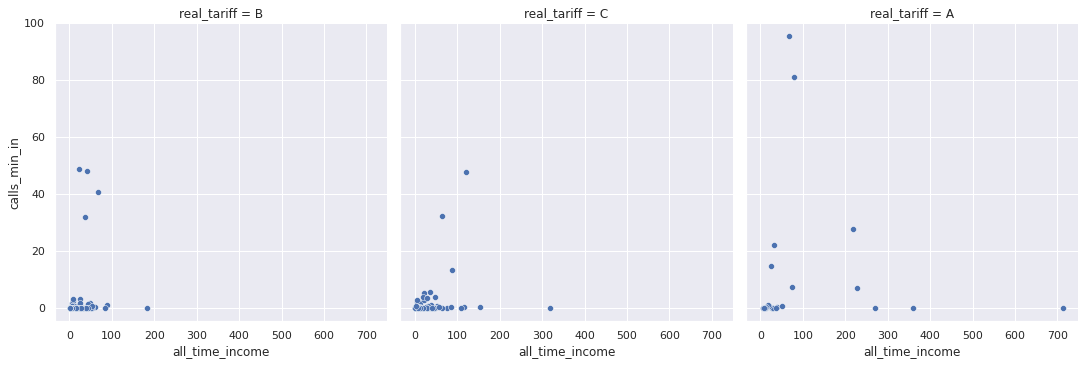

In [50]:
sns.relplot(x= d['all_time_income'] / 1000, y= d['calls_min_in'] / 1000, 
    data=d, kind='scatter',  col='real_tariff') ;

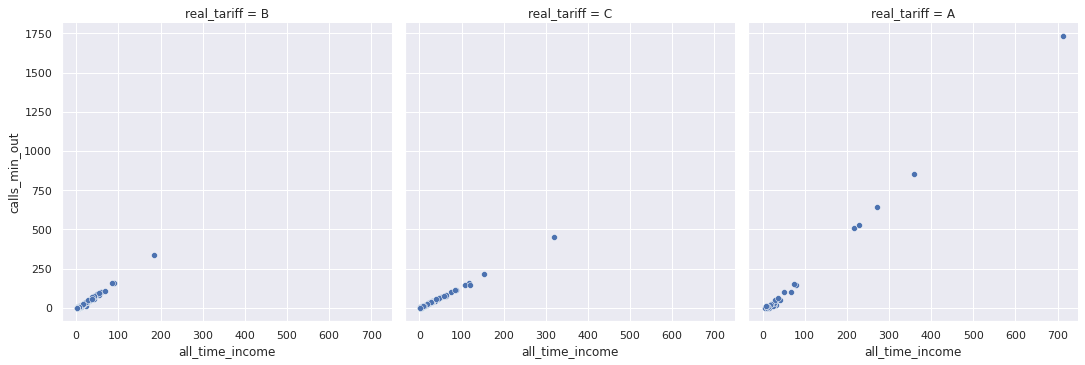

In [51]:
sns.relplot(x= d['all_time_income'] / 1000, y= d['calls_min_out'] / 1000, 
    data=d, kind='scatter',  col='real_tariff');

Графики соотношений длительности исходящих звонков внутри/вне сети к общим затратам пользователей для разных тарифов.  

Отчетливо видно что имеется прямая взаимосвязь роста затрат от длительности исходящих звонков вне сети.  

*Чем больше клиент использует минут, тем больше он платит*

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

В целом общая канва верна. Но рассуждения не вполне корректны. Ты смотришь для каждого КЦ все месяца поотдельности. Но ведь клиент не будет перключать тариф от месяца к месяцу. Нужно выбрать как-то усредненно лучший тариф, на который мы предложим перейти пользователю. 
    
В итоге стоит показать, как у нас поменялось распределение клиентов по тарифам. Сейчас мы видим только кусок таблицы и общего понимания нет
    
Также интересно чуть более подробно понять на что пользователи тратят деньги, как распределена их плата. Ты как-то совсем этого вопроса не коснулся.
    
Бонусно можно предложить свой тариф, который будет наиболее удобный и пользователям и нам
</div>

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Создал таблицу с лучшими вариантами тарифов для каждого КЦ.

Показал распределение клиентов по тарифам на действующих/лучших тарифах.
    
Построил графики соотношений трат и использованных минут по пользователям.

А в качестве бонуса можно было бы использовать идею с ежемесячной сменой тарифов. Достаточно было найди пределы затраченных минут,   при которых тарифы становились бы выгоднее других. И уже на основе этого можно было бы планировать траты на следующий месяц.  
*(стоимость услуги 5% от стоимости тарифа)  :)*
 </div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Хорошо, идея понятна, но все же бизнес так редко работает. Они наоборот практикуют годовые контракты

В остальном анализ верно дополнен, молодец

</div>

## Проверка статистических гипотез

In [52]:
used_minutes = data_client_hypotesis.pivot_table(
    index='tariff_plan', columns='month',values='total_call_duration',aggfunc='sum')
used_minutes

month,8,9,10,11
tariff_plan,,,,
A,330945,1206775,2530856,2914077
B,224792,726066,1603740,2053260
C,77537,913143,2041767,2209441


Сводная таблица с количеством использованных минут на разных тарифах по месяцам.

In [53]:
data_a = data_client_hypotesis.query('tariff_plan == "A"')
data_b = data_client_hypotesis.query('tariff_plan == "B"')
data_c = data_client_hypotesis.query('tariff_plan == "C"')

In [54]:
a_8 = data_a.query('month == 8').groupby('operator_id').agg('mean')['total_call_duration']
a_9 = data_a.query('month == 9').groupby('operator_id').agg('mean')['total_call_duration']
a_10 = data_a.query('month == 10').groupby('operator_id').agg('mean')['total_call_duration']
a_11 = data_a.query('month == 11').groupby('operator_id').agg('mean')['total_call_duration']

In [55]:
b_8 = data_b.query('month == 8').groupby('operator_id').agg('mean')['total_call_duration']
b_9 = data_b.query('month == 9').groupby('operator_id').agg('mean')['total_call_duration']
b_10 = data_b.query('month == 10').groupby('operator_id').agg('mean')['total_call_duration']
b_11 = data_b.query('month == 11').groupby('operator_id').agg('mean')['total_call_duration']

In [56]:
c_8 = data_c.query('month == 8').groupby('operator_id').agg('mean')['total_call_duration']
c_9 = data_c.query('month == 9').groupby('operator_id').agg('mean')['total_call_duration']
c_10 = data_c.query('month == 10').groupby('operator_id').agg('mean')['total_call_duration']
c_11 = data_c.query('month == 11').groupby('operator_id').agg('mean')['total_call_duration']

Разделение данных на отдельные переменные для проведения статистического теста.

In [57]:
def mannwhitneyu(a, b, c, x):
    alpha = 0.05
    
    stat_results = stats.mannwhitneyu(a, b)
    print('Сравнение среднего ежемесячного использования минут операторами между тарифами'
          ,used_minutes.index[0], 'и', used_minutes.index[1],
         'за период месяца № {0:.0f}'.format(used_minutes.columns[x]))
    print('p-значение: {0:.3f}'.format(stat_results.pvalue))
    
    if stat_results.pvalue < alpha:     
            print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
    else:
            print('Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница')
            
    print('\n ')        
            
    stat_results = stats.mannwhitneyu(a, c)
    print('Сравнение среднего ежемесячного использования минут операторами между тарифами'
          ,used_minutes.index[0], 'и', used_minutes.index[2],
         'за период месяца № {0:.0f}'.format(used_minutes.columns[x]))
    print('p-значение: {0:.3f}'.format(stat_results.pvalue))
    
    if stat_results.pvalue < alpha:     
            print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
    else:
            print('Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница')
            
    print('\n ')        
            
    stat_results = stats.mannwhitneyu(b, c)
    print('Сравнение среднего ежемесячного использования минут операторами между тарифами'
          ,used_minutes.index[1], 'и', used_minutes.index[2],
         'за период месяца № {0:.0f}'.format(used_minutes.columns[x]))
    print('p-значение: {0:.3f}'.format(stat_results.pvalue))
    
    if stat_results.pvalue < alpha:     
            print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
    else:
            print('Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница')

Функция для проведения оценки различий между двумя независимыми выборками.

Для проверки различия использованных минут между тарифами будут сформированны:  
`H₀ — нулевая` и  `H₁ — альтернативная` гипотезы.

Взаимоотношения между ними выстроены следующим образом:   **H₁** принимается **только** в том случае, если отбрасывается **H₀.**

Формулировка данной двухсторонней гипотезы будет звучать следующим образом:

* **H₀** — среднее ежемесячное количество использованных минут операторами тарифа `X`, равно среднему ежемесячному количеству использованных минут операторами тарифа `Y`
* **H₁** — среднее ежемесячное количество использованных минут операторами тарифа `X`, не равно среднему ежемесячному количеству использованных минут операторами тарифа `Y`

Для достоверности расчетов, установим критический уровень статистической значимости для двух гипотез **5%.**

In [58]:
mannwhitneyu(a_8, b_8, c_8, 0)

Сравнение среднего ежемесячного использования минут операторами между тарифами A и B за период месяца № 8
p-значение: 0.071
Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница

 
Сравнение среднего ежемесячного использования минут операторами между тарифами A и C за период месяца № 8
p-значение: 0.713
Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница

 
Сравнение среднего ежемесячного использования минут операторами между тарифами B и C за период месяца № 8
p-значение: 0.083
Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница


In [59]:
mannwhitneyu(a_9, b_9, c_9, 1)

Сравнение среднего ежемесячного использования минут операторами между тарифами A и B за период месяца № 9
p-значение: 0.000
Отвергаем нулевую гипотезу: между выборками есть значимая разница

 
Сравнение среднего ежемесячного использования минут операторами между тарифами A и C за период месяца № 9
p-значение: 0.000
Отвергаем нулевую гипотезу: между выборками есть значимая разница

 
Сравнение среднего ежемесячного использования минут операторами между тарифами B и C за период месяца № 9
p-значение: 0.457
Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница


In [60]:
mannwhitneyu(a_10, b_10, c_10, 2)

Сравнение среднего ежемесячного использования минут операторами между тарифами A и B за период месяца № 10
p-значение: 0.007
Отвергаем нулевую гипотезу: между выборками есть значимая разница

 
Сравнение среднего ежемесячного использования минут операторами между тарифами A и C за период месяца № 10
p-значение: 0.000
Отвергаем нулевую гипотезу: между выборками есть значимая разница

 
Сравнение среднего ежемесячного использования минут операторами между тарифами B и C за период месяца № 10
p-значение: 0.225
Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница


In [61]:
mannwhitneyu(a_11, b_11, c_11, 3)

Сравнение среднего ежемесячного использования минут операторами между тарифами A и B за период месяца № 11
p-значение: 0.000
Отвергаем нулевую гипотезу: между выборками есть значимая разница

 
Сравнение среднего ежемесячного использования минут операторами между тарифами A и C за период месяца № 11
p-значение: 0.000
Отвергаем нулевую гипотезу: между выборками есть значимая разница

 
Сравнение среднего ежемесячного использования минут операторами между тарифами B и C за период месяца № 11
p-значение: 0.159
Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница


<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

Здесь мы проверяем сразу много гипотез и на это нужно сделать поправку. Можно использовать, например, метод Бонферрони

</div>

In [62]:
# вероятность получить ошибку первого рода при alpha =0.05 и 12 проверках 
1 - (1 - 0.05)**12

0.45963991233736334

In [63]:
#значение alpha с учетом поправки Бонферрони
0.05 / 12

0.004166666666666667

In [64]:
# вероятность получить ошибку первого рода с поправкой Бонферрони
1 - (1 - 0.003125)**12

0.03686213564548546

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

+

</div>

In [65]:
def mannwhitneyu_new_alpha(a, b, c, x):
    alpha = 0.004
    
    stat_results = stats.mannwhitneyu(a, b)
    print('Сравнение среднего ежемесячного использования минут операторами между тарифами'
          ,used_minutes.index[0], 'и', used_minutes.index[1],
         'за период месяца № {0:.0f}'.format(used_minutes.columns[x]))
    print('p-значение: {0:.3f}'.format(stat_results.pvalue))
    
    if stat_results.pvalue < alpha:     
            print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
    else:
            print('Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница')
            
    print('\n ')        
            
    stat_results = stats.mannwhitneyu(a, c)
    print('Сравнение среднего ежемесячного использования минут операторами между тарифами'
          ,used_minutes.index[0], 'и', used_minutes.index[2],
         'за период месяца № {0:.0f}'.format(used_minutes.columns[x]))
    print('p-значение: {0:.3f}'.format(stat_results.pvalue))
    
    if stat_results.pvalue < alpha:     
            print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
    else:
            print('Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница')
            
    print('\n ')        
            
    stat_results = stats.mannwhitneyu(b, c)
    print('Сравнение среднего ежемесячного использования минут операторами между тарифами'
          ,used_minutes.index[1], 'и', used_minutes.index[2],
         'за период месяца № {0:.0f}'.format(used_minutes.columns[x]))
    print('p-значение: {0:.3f}'.format(stat_results.pvalue))
    
    if stat_results.pvalue < alpha:     
            print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
    else:
            print('Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница')

In [66]:
mannwhitneyu_new_alpha(a_8, b_8, c_8, 0)

Сравнение среднего ежемесячного использования минут операторами между тарифами A и B за период месяца № 8
p-значение: 0.071
Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница

 
Сравнение среднего ежемесячного использования минут операторами между тарифами A и C за период месяца № 8
p-значение: 0.713
Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница

 
Сравнение среднего ежемесячного использования минут операторами между тарифами B и C за период месяца № 8
p-значение: 0.083
Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница


In [67]:
mannwhitneyu_new_alpha(a_9, b_9, c_9, 1)

Сравнение среднего ежемесячного использования минут операторами между тарифами A и B за период месяца № 9
p-значение: 0.000
Отвергаем нулевую гипотезу: между выборками есть значимая разница

 
Сравнение среднего ежемесячного использования минут операторами между тарифами A и C за период месяца № 9
p-значение: 0.000
Отвергаем нулевую гипотезу: между выборками есть значимая разница

 
Сравнение среднего ежемесячного использования минут операторами между тарифами B и C за период месяца № 9
p-значение: 0.457
Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница


In [68]:
mannwhitneyu_new_alpha(a_10, b_10, c_10, 2)

Сравнение среднего ежемесячного использования минут операторами между тарифами A и B за период месяца № 10
p-значение: 0.007
Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница

 
Сравнение среднего ежемесячного использования минут операторами между тарифами A и C за период месяца № 10
p-значение: 0.000
Отвергаем нулевую гипотезу: между выборками есть значимая разница

 
Сравнение среднего ежемесячного использования минут операторами между тарифами B и C за период месяца № 10
p-значение: 0.225
Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница


In [69]:
mannwhitneyu_new_alpha(a_11, b_11, c_11, 3)

Сравнение среднего ежемесячного использования минут операторами между тарифами A и B за период месяца № 11
p-значение: 0.000
Отвергаем нулевую гипотезу: между выборками есть значимая разница

 
Сравнение среднего ежемесячного использования минут операторами между тарифами A и C за период месяца № 11
p-значение: 0.000
Отвергаем нулевую гипотезу: между выборками есть значимая разница

 
Сравнение среднего ежемесячного использования минут операторами между тарифами B и C за период месяца № 11
p-значение: 0.159
Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница


При повторном проведении тестов с учетом поправки Бонферрони результат тестов изменился лишь единожды.

* Сравнение среднего ежемесячного использования минут операторами между тарифами A и B за период месяца № 10

В этом случае нулевая гипотеза не была отвергнута.

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Применил метод Бонферрони.
    
 </div>

In [70]:
calls_count = data_client_hypotesis.pivot_table(
    index='month', columns=['tariff_plan','direction'],values='calls_count',aggfunc='sum')
calls_count

tariff_plan      A             B             C       
direction       in    out     in    out     in    out
month                                                
8             1402   8945   1698   4303    747   1251
9             6261  33779   6564   9896   5668  15098
10           33771  69350  11849  21906  13838  37187
11           29076  60775  15596  27543  17002  42529

Сводная таблица с количеством входящих\исходящих звонко на разных тарифах по месяцам.

In [71]:
a_in = data_a.query('direction == "in"').groupby('month').agg('sum')['calls_count']
a_out = data_a.query('direction == "out"').groupby('month').agg('sum')['calls_count']

In [72]:
b_in = data_b.query('direction == "in"').groupby('month').agg('sum')['calls_count']
b_out = data_b.query('direction == "out"').groupby('month').agg('sum')['calls_count']

In [73]:
c_in = data_c.query('direction == "in"').groupby('month').agg('sum')['calls_count']
c_out = data_c.query('direction == "out"').groupby('month').agg('sum')['calls_count']

Разделение данных на отдельные переменные для проведения статистического теста.

In [74]:
def mannwhitneyu_2(a, b, x):
    alpha = 0.05
    
    stat_results = stats.mannwhitneyu(a, b)
    print('Сравнение среднего ежемесячного количества входящих/исходящих звонков тарифа'
          ,used_minutes.index[x])
    print('p-значение: {0:.3f}'.format(stat_results.pvalue))
    
    if stat_results.pvalue < alpha:     
            print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
    else:
            print('Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница')

Функция для проведения оценки различий между двумя независимыми выборками.

Для проверки различия количества входящих\исходящих звонков между тарифами будут сформированны:  
`H₀ — нулевая` и  `H₁ — альтернативная` гипотезы.

Взаимоотношения между ними выстроены следующим образом:   **H₁** принимается **только** в том случае, если отбрасывается **H₀.**

Формулировка данной двухсторонней гипотезы будет звучать следующим образом:

* **H₀** — среднее ежемесячное количество исходящих звонков тарифа  `X`, равно среднему ежемесячному количеству входящих звонков тарифа `Y`
* **H₁** — среднее ежемесячное количество исходящих звонков тарифа  `X`, не равно среднему ежемесячному количеству входящих звонков тарифа `Y`

Для достоверности расчетов, установим критический уровень статистической значимости для двух гипотез **5%.**

In [75]:
mannwhitneyu_2(a_in, a_out, 0)

Сравнение среднего ежемесячного количества входящих/исходящих звонков тарифа A
p-значение: 0.114
Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница


In [76]:
mannwhitneyu_2(b_in, b_out, 1)

Сравнение среднего ежемесячного количества входящих/исходящих звонков тарифа B
p-значение: 0.486
Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница


In [77]:
mannwhitneyu_2(c_in, c_out, 2)

Сравнение среднего ежемесячного количества входящих/исходящих звонков тарифа C
p-значение: 0.343
Не получилось отвергнуть нулевую гипотезу, между выборками отстутствует значимая разница


По полученным данным имеются следущие факты:  
* Статистически значимые соотношения в количестве входящих/исходящих звонков тарифа **«A»** - отсутствуют.
* Статистически значимые соотношения в количестве входящих/исходящих звонков тарифа **«B»** - отсутствуют.
* Статистически значимые соотношения в количестве входящих/исходящих звонков тарифа **«C»** - отсутствуют.

Из чего следует вывод, что никакой из тарифов не используют в большей степени для звонков *только* только в одном направлении.

<div class="alert alert-danger">
    
**Комментарий ревьюера**

**#ошибка**

И какие выводы мы можем сделать по существу из проверки гипотез? Что мы увидели?
    
</div>

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Добавил краткий вывод.
    
 </div>

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

Хорошо

</div>

## Общий вывод и рекомендации

На основе всей вышеизложенной информации, всех предоставленных графиков, таблиц и вычислений можно сделать следующие выводы.

* Наиболее предпочтительными клиентами для компании «Нупозвони» являются пользователи тарифа **«С»**
* При переводе клиентов на более выгодный для них тариф - **«A»**, компании будет зарабатывать меньше только первые 3 месяца.
* Наибольшие потери компания понесет при переводе клиентов с тарифа - **«C»** на другие.
* Количество пользователей с неоптимальными тарифами - **147**
* Восполнение потерь при переводе всех клиентов на оптимальные тарифы произойдет за **10** календарных дней.

Наилучшей рекомендацией для компании «Нупозвони», будет предложение о переводе всех доступных клиентов на более выгодные тарифы
и все последующие кратковременные потери будут возмещены за счет повышения LTV пользователей.

<div class="alert alert-success">
    
**Комментарий ревьюера - 2**

**#ок**

ВЫводы вполне соответствуют целям проекта

</div>